In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import edhec_risk_kit as erk

In [2]:
hfi= erk.get_hfi_returns()

# semideviation

In [3]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

# we apply a boolean mask which filters those hfi<0 because only that matters for semi-deviation

In [4]:
hfi[hfi<0].std(ddof=0) 

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [6]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

# Var and CVar
Value at risk

- Historic VaR
- Parametric VaR-Gaussian
- Modified Cornish-Fisher VaR


In [7]:
import numpy as np


In [8]:
np.percentile(hfi,5,axis=0) 

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

# how to interpret this? Here each element in the array represents each column in hfi(represented as rows but they are actually columns). so, first element says that in given month,there is a 5% chance that 'Convertible Arbitrage' will lose about 1.5% or worse


In [13]:
def var_historic(r, level=5):
    """
    VaR historic
    """
    if isinstance(r, pd.DataFrame):
       return r.aggregate(var_historic,level=level)
    elif isinstance(r,pd.Series):
       return -np.percentile(r,level) #since we want positive VaR
    else:
        raise TypeError("Expected r to be series or DataFrame")
        

In [12]:
var_historic(hfi)

Convertible Arbitrage    -0.01576
CTA Global               -0.03169
Distressed Securities    -0.01966
Emerging Markets         -0.04247
Equity Market Neutral    -0.00814
Event Driven             -0.02535
Fixed Income Arbitrage   -0.00787
Global Macro             -0.01499
Long/Short Equity        -0.02598
Merger Arbitrage         -0.01047
Relative Value           -0.01174
Short Selling            -0.06783
Funds Of Funds           -0.02047
dtype: float64

In [16]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [17]:
from scipy.stats import norm

# here we are going to get the z-score using percentage. The percentage tells us the fraction of the distribution lying below a certain point in the normal distribution. 
# z-score is also known as standard score.
# the standard score is the number of standard deviations by which the value of a raw score is above or below the mean value of what is being observed or measured. Raw scores above the mean have positive standard scores, while those below the mean have negative standard scores.

In [18]:
norm.ppf(0.5) #here we are exactly in the middle of the distribution, the mean. hence the z-score is 0.

0.0

In [19]:
norm.ppf(0.05)

-1.6448536269514729

In [20]:
z= norm.ppf(0.05)
z                    

-1.6448536269514729

# alternate method :scipy.stats.zscore(arr, axis=0, ddof=0)

In [21]:
-(hfi.mean()+ z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

# Z = (x - μ) / σ. This is the formula of z-score. so the last code shows that to compute the VaR, we multiply our z-score by the standard deviation and we get the deviation of the raw score from the mean. then add the mean to get the raw score. The raw score is the VaR.

In [22]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

# we are now going to compare the 3 results

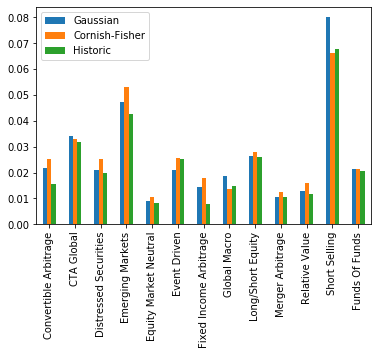

In [25]:
var_list=[erk.var_gaussian(hfi),erk.var_gaussian(hfi,modified=True),erk.var_historic(hfi)]
comparison=pd.concat(var_list,axis=1)
comparison.columns=["Gaussian","Cornish-Fisher","Historic"]
comparison.plot.bar()

In [26]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

# Interpretation of Cvar: eg: Convertible Arbitrage. If the worst 5% of possible cases happen, the average of that is a 3.6% loss per month.